In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset7/combined_dataset (1).csv
/kaggle/input/dataset7/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
# json_normalize has been moved to the top level pandas namespace
from pandas import json_normalize
import datetime

In [3]:
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')

In [4]:
youtubeUS = pd.read_csv('/kaggle/input/dataset7/combined_dataset (1).csv', encoding='latin-1')

In [5]:
CategoryCSV = pd.read_csv('/kaggle/input/dataset7/test.csv')
print(CategoryCSV)

    id                  title
0    1       Film & Animation
1    2       Autos & Vehicles
2   10                  Music
3   15         Pets & Animals
4   17                 Sports
5   18           Short Movies
6   19        Travel & Events
7   20                 Gaming
8   21          Videoblogging
9   22         People & Blogs
10  23                 Comedy
11  24          Entertainment
12  25        News & Politics
13  26          Howto & Style
14  27              Education
15  28   Science & Technology
16  29  Nonprofits & Activism
17  30                 Movies
18  31        Anime/Animation
19  32       Action/Adventure
20  33               Classics
21  34                 Comedy
22  35            Documentary
23  36                  Drama
24  37                 Family
25  38                Foreign
26  39                 Horror
27  40         Sci-Fi/Fantasy
28  41               Thriller
29  42                 Shorts
30  43                  Shows
31  44               Trailers


In [6]:
Trend_Video_US = youtubeUS

In [7]:
Trend_Video_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [8]:
Trend_Video_US.shape

(381568, 16)

In [9]:
Trend_Video_US = Trend_Video_US.drop(['comments_disabled','ratings_disabled',
                      'description','tags', 'thumbnail_link', 'video_error_or_removed'], axis= 1)

In [10]:
Trend_Video_US.isnull()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
381563,False,False,False,False,False,False,False,False,False,False
381564,False,False,False,False,False,False,False,False,False,False
381565,False,False,False,False,False,False,False,False,False,False
381566,False,False,False,False,False,False,False,False,False,False


In [11]:
Trend_Video_US.dtypes

video_id          object
trending_date     object
title             object
channel_title     object
category_id      float64
publish_time      object
views             object
likes             object
dislikes          object
comment_count    float64
dtype: object

In [12]:
CategoryCSV = CategoryCSV.rename(columns={'id':'category_id'})
CategoryCSV = CategoryCSV.rename(columns={'title':'category'})

In [13]:
Trend_Video_US_CAT = pd.merge(Trend_Video_US,CategoryCSV,how="left",on="category_id")

In [14]:
Trend_Video_US_CAT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,17158579.0,787425.0,43420.0,125882.0,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,1014651.0,127794.0,1688.0,13030.0,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,3191434.0,146035.0,5339.0,8181.0,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,2095828.0,132239.0,1989.0,17518.0,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,33523622.0,1634130.0,21082.0,85067.0,Music


In [15]:
# The original format string '%y.%d.%m' was incorrect.
# Looking at the data in the CSV file, the correct format is '%y.%d.%m'.
Trend_Video_US_CAT['trending_date'] = pd.to_datetime(Trend_Video_US_CAT['trending_date'], format='%y.%d.%m', errors='coerce').dt.date

In [16]:
# Convert 'publish_time' to datetime, handling errors
Trend_Video_US_CAT['publish_date'] = pd.to_datetime(Trend_Video_US_CAT['publish_time'], errors='coerce').dt.date

# Filter out rows where 'publish_date' is NaT (Not a Time)
Trend_Video_US_CAT = Trend_Video_US_CAT[Trend_Video_US_CAT['publish_date'].notna()]

In [17]:
Trend_Video_US_CAT['publish_time'] = pd.to_datetime(Trend_Video_US_CAT['publish_time']).dt.time

In [18]:
Trend_Video_US_CAT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category,publish_date
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,17:00:03,17158579.0,787425.0,43420.0,125882.0,Music,2017-11-10
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,17:00:00,1014651.0,127794.0,1688.0,13030.0,Comedy,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,19:05:24,3191434.0,146035.0,5339.0,8181.0,Comedy,2017-11-12
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,18:01:41,2095828.0,132239.0,1989.0,17518.0,Entertainment,2017-11-12
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11:04:14,33523622.0,1634130.0,21082.0,85067.0,Music,2017-11-09


In [19]:
#making y changing unsupervised to supervised

date_diff = Trend_Video_US_CAT

date_diff['date_diff'] = date_diff['trending_date']-date_diff['publish_date']

# Convert 'date_diff' to timedelta type before using .dt.days
Trend_Video_US_CAT['Days_to_Trend'] = pd.to_timedelta(date_diff['date_diff']).dt.days

In [20]:
Trend_Video_US_CAT.drop(['date_diff'], axis= 1)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category,publish_date,Days_to_Trend
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,17:00:03,17158579.0,787425.0,43420.0,125882.0,Music,2017-11-10,4
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,17:00:00,1014651.0,127794.0,1688.0,13030.0,Comedy,2017-11-13,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,19:05:24,3191434.0,146035.0,5339.0,8181.0,Comedy,2017-11-12,2
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,18:01:41,2095828.0,132239.0,1989.0,17518.0,Entertainment,2017-11-12,2
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11:04:14,33523622.0,1634130.0,21082.0,85067.0,Music,2017-11-09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381563,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15.0,13:00:04,1685609.0,38160.0,1385.0,2657.0,Pets & Animals,2018-05-18,27
381564,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22.0,01:00:06,1064798.0,60008.0,382.0,3936.0,People & Blogs,2018-05-18,27
381565,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24.0,17:34:22,1066451.0,48068.0,1032.0,3992.0,Entertainment,2018-05-18,27
381566,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1.0,17:00:04,5660813.0,192957.0,2846.0,13088.0,Film & Animation,2018-05-17,28


In [21]:
#output variable is ready when video takes more than 1 day its tier 2
Trend_Video_US_CAT['class'] = np.where((Trend_Video_US_CAT['Days_to_Trend']>1), 'class2', 'class1')

In [22]:
Trend_Video_US_CAT['class']= Trend_Video_US_CAT['class'].map({'class1' : 0 , 'class2' : 1} )

In [23]:
Trend_Video_US_CAT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category,publish_date,date_diff,Days_to_Trend,class
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,17:00:03,17158579.0,787425.0,43420.0,125882.0,Music,2017-11-10,"4 days, 0:00:00",4,1
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,17:00:00,1014651.0,127794.0,1688.0,13030.0,Comedy,2017-11-13,"1 day, 0:00:00",1,0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,19:05:24,3191434.0,146035.0,5339.0,8181.0,Comedy,2017-11-12,"2 days, 0:00:00",2,1
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,18:01:41,2095828.0,132239.0,1989.0,17518.0,Entertainment,2017-11-12,"2 days, 0:00:00",2,1
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11:04:14,33523622.0,1634130.0,21082.0,85067.0,Music,2017-11-09,"5 days, 0:00:00",5,1


## Modelling

In [24]:
df1 = Trend_Video_US_CAT

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Rename the target column
df1 = df1.rename(columns={'class': 'tier'})

# Convert 'views', 'likes', 'dislikes', 'comment_count' to numeric
for col in ['views', 'likes', 'dislikes', 'comment_count']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Now create the new features
df1['like_ratio'] = df1['likes'] / (df1['views'] + 1)
df1['dislike_ratio'] = df1['dislikes'] / (df1['views'] + 1)
df1['engagement'] = (df1['likes'] + df1['dislikes'] + df1['comment_count']) / (df1['views'] + 1)
# Define features and target
feature_columns = ['views', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'dislike_ratio', 'engagement']
X = df1[feature_columns]
Y = df1['tier']

# Clean the data
df_cleaned = pd.concat([X, Y], axis=1).dropna()
X = df_cleaned[feature_columns]
Y = df_cleaned['tier']

# Feature selection: Select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, Y)

# Optionally, get the selected feature names
selected_features = [feature_columns[i] for i in selector.get_support(indices=True)]
print("Selected features:", selected_features)

# Split into train and test sets using selected features
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)


Selected features: ['views', 'likes', 'comment_count', 'like_ratio', 'engagement']


### Logistic Regression Model

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.6827
Confusion Matrix:
[[51310  6862]
 [28922 25689]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74     58172
           1       0.79      0.47      0.59     54611

    accuracy                           0.68    112783
   macro avg       0.71      0.68      0.67    112783
weighted avg       0.71      0.68      0.67    112783

AUC: 0.7572


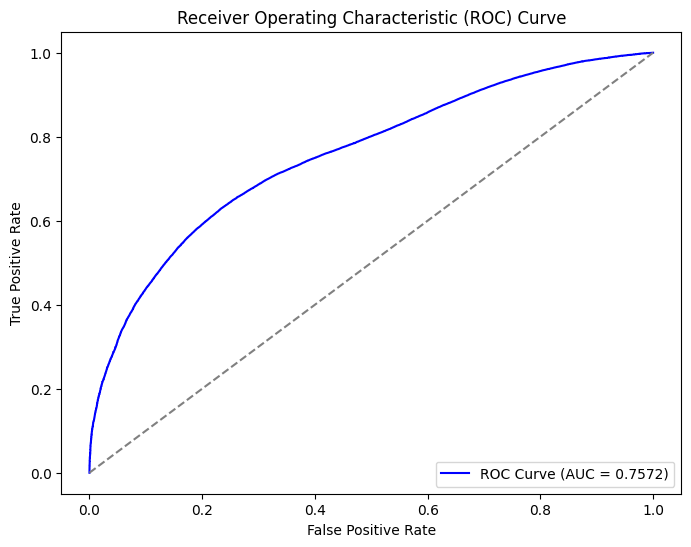

Absolute Error: 0.3173
RMSE: 0.5633


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Initialize Logistic Regression
LR = LogisticRegression(max_iter=1000)

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solver types
    'penalty': ['l1', 'l2']  # Regularization type
}

grid_search_lr = GridSearchCV(LR, param_grid_lr, cv=3, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, Y_train)

# Get best parameters and make predictions
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Print best parameters for Logistic Regression
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")

# Print performance metrics
accuracy = accuracy_score(Y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# Print classification report
cr = classification_report(Y_test, y_pred_lr)
print("Classification Report:")
print(cr)

# Calculate ROC Curve and AUC
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]  # Probability scores for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_lr)
roc_auc = roc_auc_score(Y_test, y_prob_lr)

print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Calculate Absolute Error
absolute_error = mean_absolute_error(Y_test, y_pred_lr)
print(f"Absolute Error: {absolute_error:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_lr))
print(f"RMSE: {rmse:.4f}")


### K Nearest Neighbors Model

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.7455
Confusion Matrix:
[[47006 11166]
 [17540 37071]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     58172
           1       0.77      0.68      0.72     54611

    accuracy                           0.75    112783
   macro avg       0.75      0.74      0.74    112783
weighted avg       0.75      0.75      0.74    112783

AUC: 0.8378


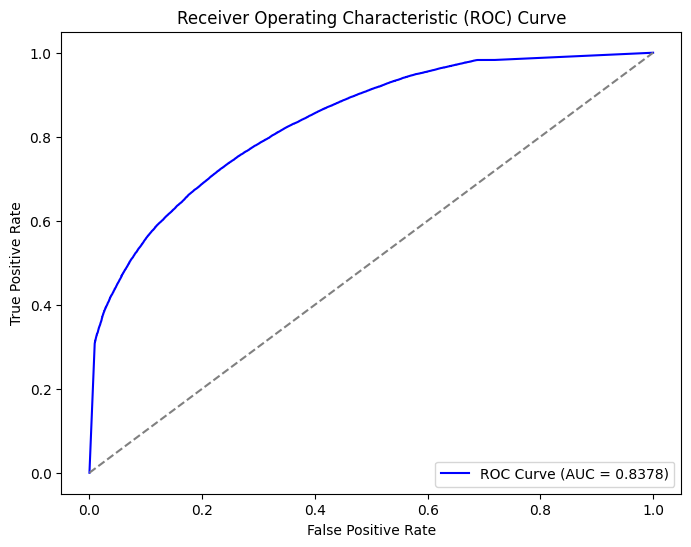

Absolute Error: 0.2545
RMSE: 0.5045


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize KNN
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute the nearest neighbors
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, Y_train)

# Get best parameters and make predictions
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Print best parameters for KNN
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Print performance metrics
accuracy = accuracy_score(Y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)

# Print classification report
cr = classification_report(Y_test, y_pred_knn)
print("Classification Report:")
print(cr)

# Calculate ROC Curve and AUC
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]  # Probability scores for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_knn)
roc_auc = roc_auc_score(Y_test, y_prob_knn)

print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Calculate Absolute Error
absolute_error = mean_absolute_error(Y_test, y_pred_knn)
print(f"Absolute Error: {absolute_error:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_knn))
print(f"RMSE: {rmse:.4f}")


### Random Forest Model

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  53.4s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 4.2min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 4.1min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, max_features=au

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 2.7min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.8min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.3min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 2.8min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  49.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  58.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  56.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  39.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 2.5min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.3min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.4min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.6min
[CV] END max_depth=20, max_features=s

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 4.1min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  45.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.8min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.3min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 3.8min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 3.8min
[CV] END max_depth=30, max_features=

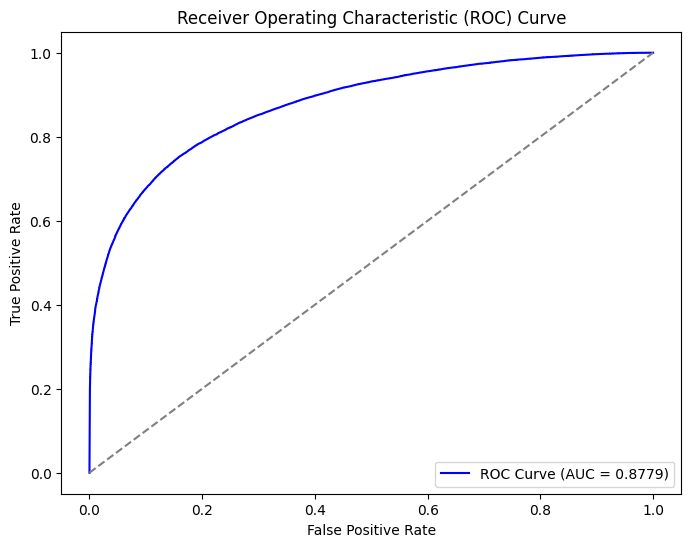

Absolute Error: 0.2024
RMSE: 0.4498


In [31]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
# import numpy as np
# import warnings

# # Suppress warnings for cleaner output
# warnings.filterwarnings("ignore")

# # Define the RandomForestClassifier
# random_forest = RandomForestClassifier(
#     random_state=42, 
#     oob_score=True, 
#     n_jobs=-1,  # Use all available cores
#     warm_start=True  # Reuse previous solutions to speed up
# )

# # Define the parameter grid for RandomizedSearchCV
# param_distributions = {
#     'n_estimators': [100, 300, 500,600, 1000],
#     'max_depth': [10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'max_features': ['auto', 'sqrt', 'log2'],
# }

# # Use a smaller number of iterations and limit the parallelism to one CPU core
# random_search = RandomizedSearchCV(
#     estimator=random_forest,
#     param_distributions=param_distributions,
#     n_iter=50,  # Further reduced number of iterations to speed up the process
#     cv=2,  # Reduced number of cross-validation folds
#     n_jobs=-1,  # Use all cores to speed up
#     verbose=2,
#     random_state=42
# )

# # Fit the random search to the training data
# random_search.fit(X_train, Y_train)

# # Output the best hyperparameters found during the search
# print(f"Best hyperparameters: {random_search.best_params_}")

# # Use the best model from RandomizedSearchCV to predict on the test set
# best_model = random_search.best_estimator_
# y_pred_rf = best_model.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(Y_test, y_pred_rf)
# print(f"Improved Accuracy: {accuracy:.4f}")

# # Print confusion matrix
# cm = confusion_matrix(Y_test, y_pred_rf)
# print("Confusion Matrix:")
# print(cm)

# # Print classification report
# cr = classification_report(Y_test, y_pred_rf)
# print("Classification Report:")
# print(cr)

# # Calculate ROC Curve and AUC (Only for binary classification, modify as needed for multiclass)
# y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability scores for positive class (adjust for multiclass)
# fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label=1)  # Use pos_label for binary class
# roc_auc = roc_auc_score(Y_test, y_prob)

# print(f"AUC: {roc_auc:.4f}")

# # Plot ROC Curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()



import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Assuming X and Y are your features and target variable
# For demonstration, let's use a simple dataset split
# Replace this with your actual dataset loading mechanism
# Example: X, Y = load_your_data()

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the RandomForestClassifier
random_forest = RandomForestClassifier(
    random_state=42,
    oob_score=True,
    n_jobs=-1,  # Use all available cores
    warm_start=True  # Reuse previous solutions to speed up
)

# Define the parameter grid for RandomizedSearchCV (smaller grid for faster search)
param_distributions = {
    'n_estimators': [100, 200, 300],  # Reduced number of estimators
    'max_depth': [10, 20, 30, 40],    # Reduced max_depth values
    'min_samples_split': [2, 5, 10],  # Reduced min_samples_split values
    'min_samples_leaf': [1, 2, 4],    # Reduced min_samples_leaf values
    'max_features': ['auto', 'sqrt'],  # Limiting max_features to common values
}

# Use StratifiedKFold for better accuracy in imbalanced datasets
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_distributions,
    n_iter=30,  # Reduced number of iterations for quicker search
    cv=cv,  # StratifiedKFold for better performance with imbalanced data
    n_jobs=-1,  # Use all cores to speed up
    verbose=2,
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train, Y_train)

# Output the best hyperparameters found during the search
print(f"Best hyperparameters: {random_search.best_params_}")

# Use the best model from RandomizedSearchCV to predict on the test set
best_model = random_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred_rf)
print(f"Improved Accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Print classification report
cr = classification_report(Y_test, y_pred_rf)
print("Classification Report:")
print(cr)

# Calculate ROC Curve and AUC (Only for binary classification, modify as needed for multiclass)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability scores for positive class (adjust for multiclass)
fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label=1)  # Use pos_label for binary class
roc_auc = roc_auc_score(Y_test, y_prob)

print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Absolute Error
absolute_error = mean_absolute_error(Y_test, y_pred_rf)
print(f"Absolute Error: {absolute_error:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
print(f"RMSE: {rmse:.4f}")



### Decision Tree Model

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  50.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 4.3min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.7min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

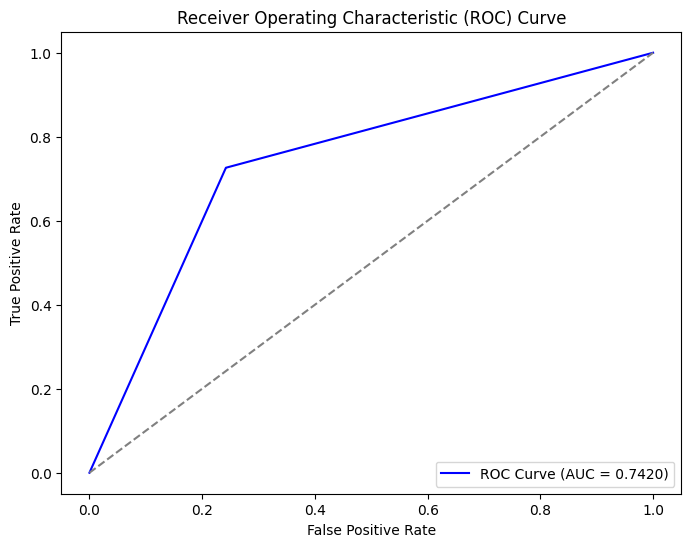

Absolute Error: 0.2575
RMSE: 0.5074


In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Expand the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [None, 5, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400],  # Expanded depth range
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70, 80],  # Added larger values
    'min_samples_leaf': [1, 2, 4, 10, 15, 20, 30, 40, 50],  # Added larger values
    'max_features': ['auto', 'sqrt', 'log2', None, 'log2'],  # Added 'None' option
    'criterion': ['gini', 'entropy'],  # Keep both criteria
    'splitter': ['best', 'random'],  # Added splitting strategy
}

# Initialize RandomizedSearchCV with more iterations and increased cross-validation
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=500, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search_dt.fit(X_train, Y_train)  # Fit the random search

# Get the best model
best_dt = random_search_dt.best_estimator_

# Make predictions with the best model
y_pred_dt = best_dt.predict(X_test)

# Print accuracy
accuracy = accuracy_score(Y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)

# Print classification report
cr = classification_report(Y_test, y_pred_dt)
print("Classification Report:")
print(cr)

# Calculate ROC Curve and AUC
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]  # Probability scores for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_dt)
roc_auc = roc_auc_score(Y_test, y_prob_dt)

print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Calculate Absolute Error
absolute_error = mean_absolute_error(Y_test, y_pred_dt)
print(f"Absolute Error: {absolute_error:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
print(f"RMSE: {rmse:.4f}")

### XGBoost

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy: 0.7444
Confusion Matrix:
[[45990 12182]
 [16650 37961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     58172
           1       0.76      0.70      0.72     54611

    accuracy                           0.74    112783
   macro avg       0.75      0.74      0.74    112783
weighted avg       0.75      0.74      0.74    112783

AUC: 0.8287


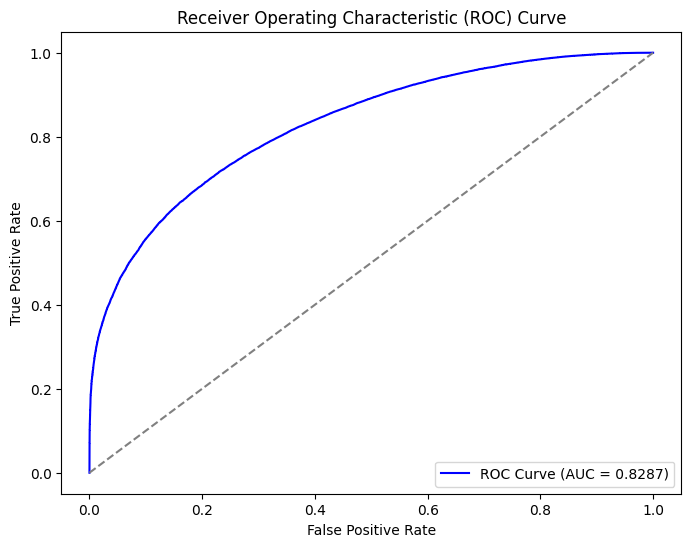

Absolute Error: 0.2556
RMSE: 0.5056


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_curve,roc_auc_score
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Optional: Silence future warnings
warnings.filterwarnings('ignore')

# Define the model with a fixed random seed
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Stratified k-fold for better distribution of classes
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_xgb = best_model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(Y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_xgb)
print("Confusion Matrix:")
print(cm)

# Print classification report
cr = classification_report(Y_test, y_pred_xgb)
print("Classification Report:")
print(cr)


# Calculate ROC Curve and AUC
y_prob_dt = best_model.predict_proba(X_test)[:, 1]  # Probability scores for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_dt)
roc_auc = roc_auc_score(Y_test, y_prob_dt)

print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Absolute Error
absolute_error = mean_absolute_error(Y_test, y_pred_xgb)
print(f"Absolute Error: {absolute_error:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_xgb))
print(f"RMSE: {rmse:.4f}")



### lightgbm

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[LightGBM] [Info] Number of positive: 101738, number of negative: 108788
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 210526, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483256 -> initscore=-0.067000
[LightGBM] [Info] Start training from score -0.067000
[LightGBM] [Info] Number of positive: 101737, number of negative: 108789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 210526, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483251 -> initscore=-0.06701

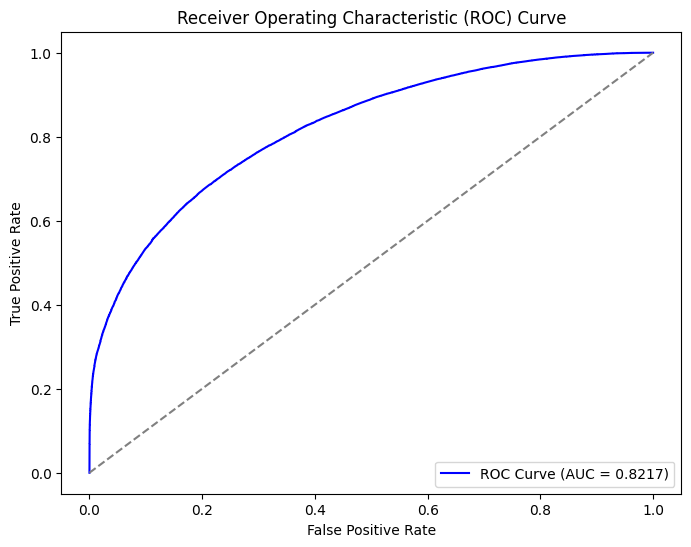

Absolute Error: 0.2625
RMSE: 0.5124


In [34]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix ,roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Optional: Silence future warnings
warnings.filterwarnings('ignore')

# Define the model with a fixed random seed
lgb_model = lgb.LGBMClassifier(random_state=42)

# Stratified k-fold for better distribution of classes
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameters to tune
param_grid = {
    'num_leaves': [31, 50, 75,100],  # Number of leaves in the tree
    'max_depth': [-1, 5, 10,15],  # Maximum depth of tree
    'learning_rate': [0.05, 0.1, 0.2,0.3],  # Step size shrinking
    'n_estimators': [20, 40, 60,70]  # Number of trees
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, Y_train)

# Get the best model from the grid search
best_lgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred_lgb = best_lgb_model.predict(X_test)


# Print accuracy
accuracy = accuracy_score(Y_test, y_pred_lgb)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_lgb)
print("Confusion Matrix:")
print(cm)

# Print classification report
cr = classification_report(Y_test, y_pred_lgb)
print("Classification Report:")
print(cr)



# Calculate ROC Curve and AUC
y_prob_dt = best_lgb_model.predict_proba(X_test)[:, 1]  # Probability scores for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_dt)
roc_auc = roc_auc_score(Y_test, y_prob_dt)

print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Calculate Absolute Error
absolute_error = mean_absolute_error(Y_test, y_pred_lgb)
print(f"Absolute Error: {absolute_error:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_lgb))
print(f"RMSE: {rmse:.4f}")


In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix ,roc_curve, roc_auc_score
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# import warnings
# from sklearn.metrics import mean_absolute_error, mean_squared_error


# # Optional: Silence future warnings
# warnings.filterwarnings('ignore')

# # Define the model with a fixed random seed
# lgb_model = lgb.LGBMClassifier(random_state=42)

# # Stratified k-fold for better distribution of classes
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Hyperparameters to tune
# param_grid = {
#     'num_leaves': [31, 50, 75],  # Number of leaves in the tree
#     'max_depth': [-1, 5, 10],  # Maximum depth of tree
#     'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinking
#     'n_estimators': [20, 40, 60]  # Number of trees
# }

# # Set up GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)

# # Fit the model using GridSearchCV
# grid_search.fit(X_train, Y_train)

# # Get the best model from the grid search
# best_lgb_model = grid_search.best_estimator_

# # Predict on the test set
# y_pred_lgb = best_lgb_model.predict(X_test)


# # Print accuracy
# accuracy = accuracy_score(Y_test, y_pred_lgb)
# print(f"Accuracy: {accuracy:.4f}")

# # Print confusion matrix
# cm = confusion_matrix(Y_test, y_pred_lgb)
# print("Confusion Matrix:")
# print(cm)

# # Print classification report
# cr = classification_report(Y_test, y_pred_lgb)
# print("Classification Report:")
# print(cr)



# # Calculate ROC Curve and AUC
# y_prob_dt = best_lgb_model.predict_proba(X_test)[:, 1]  # Probability scores for positive class
# fpr, tpr, thresholds = roc_curve(Y_test, y_prob_dt)
# roc_auc = roc_auc_score(Y_test, y_prob_dt)

# print(f"AUC: {roc_auc:.4f}")

# # Plot ROC Curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Calculate Absolute Error
# absolute_error = mean_absolute_error(Y_test, y_pred_lgb)
# print(f"Absolute Error: {absolute_error:.4f}")

# # Calculate RMSE (Root Mean Squared Error)
# rmse = np.sqrt(mean_squared_error(Y_test, y_pred_lgb))
# print(f"RMSE: {rmse:.4f}")


### Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Calculate scores for all models
log_reg_accuracy = accuracy_score(Y_test, y_pred_lr)
log_reg_precision = precision_score(Y_test, y_pred_lr)
log_reg_f1 = f1_score(Y_test, y_pred_lr)

knn_accuracy = accuracy_score(Y_test, y_pred_knn)
knn_precision = precision_score(Y_test, y_pred_knn)
knn_f1 = f1_score(Y_test, y_pred_knn)

rf_accuracy = accuracy_score(Y_test, y_pred_rf)
rf_precision = precision_score(Y_test, y_pred_rf)
rf_f1 = f1_score(Y_test, y_pred_rf)

dt_accuracy = accuracy_score(Y_test, y_pred_dt)
dt_precision = precision_score(Y_test, y_pred_dt)
dt_f1 = f1_score(Y_test, y_pred_dt)

xgb_accuracy = accuracy_score(Y_test, y_pred_xgb)
xgb_precision = precision_score(Y_test, y_pred_xgb)
xgb_f1 = f1_score(Y_test, y_pred_xgb)

lgb_accuracy = accuracy_score(Y_test, y_pred_lgb)
lgb_precision = precision_score(Y_test, y_pred_lgb)
lgb_f1 = f1_score(Y_test, y_pred_lgb)


# Print scores for each model
print('Logistic Regression')
print('---------------------------------------------')
print('Accuracy Score:', log_reg_accuracy)
print('Precision Score:', log_reg_precision)
print('F1 Score:', log_reg_f1)
print('---------------------------------------------')

print('Knn Model')
print('---------------------------------------------')
print('Accuracy Score:', knn_accuracy)
print('Precision Score:', knn_precision)
print('F1 Score:', knn_f1)
print('---------------------------------------------')

print('Random Forest Model')
print('---------------------------------------------')
print('Accuracy Score:', rf_accuracy)
print('Precision Score:', rf_precision)
print('F1 Score:', rf_f1)
print('---------------------------------------------')

print('Decision Tree Model')
print('---------------------------------------------')
print('Accuracy Score:', dt_accuracy)
print('Precision Score:', dt_precision)
print('F1 Score:', dt_f1)
print('---------------------------------------------')

print('XGBoost Model')
print('---------------------------------------------')
print('Accuracy Score:', xgb_accuracy)
print('Precision Score:', xgb_precision)
print('F1 Score:', xgb_f1)
print('---------------------------------------------')

print('LightGBM Model')
print('---------------------------------------------')
print('Accuracy Score:', lgb_accuracy)
print('Precision Score:', lgb_precision)
print('F1 Score:', lgb_f1)
print('---------------------------------------------')

# Compare models based on F1 Score (or any other metric you prefer)
model_scores = {
    'Logistic Regression': log_reg_f1,
    'Knn Model': knn_f1,
    'Random Forest': rf_f1,
    'Decision Tree': dt_f1,
    'XGBoost': xgb_f1,
    'LightGBM': lgb_f1
}

# Find the best model based on F1 Score (or Accuracy, Precision)
best_model = max(model_scores, key=model_scores.get)

print('---------------------------------------------')
print(f'Best Model based on F1 Score: {best_model}')
print(f'F1 Score: {model_scores[best_model]}')
print('---------------------------------------------')


Logistic Regression
---------------------------------------------
Accuracy Score: 0.6827181401452347
Precision Score: 0.789192344321219
F1 Score: 0.5894541199146417
---------------------------------------------
Knn Model
---------------------------------------------
Accuracy Score: 0.7454758252573526
Precision Score: 0.7685179426581255
F1 Score: 0.7208890790292469
---------------------------------------------
Random Forest Model
---------------------------------------------
Accuracy Score: 0.7976379418884052
Precision Score: 0.8227994638287501
F1 Score: 0.7802289863166713
---------------------------------------------
Decision Tree Model
---------------------------------------------
Accuracy Score: 0.7425143860333561
Precision Score: 0.7379450244728565
F1 Score: 0.7319648526914274
---------------------------------------------
XGBoost Model
---------------------------------------------
Accuracy Score: 0.7443586356099767
Precision Score: 0.7570548232056319
F1 Score: 0.7247646867900032
---

### visualization the model

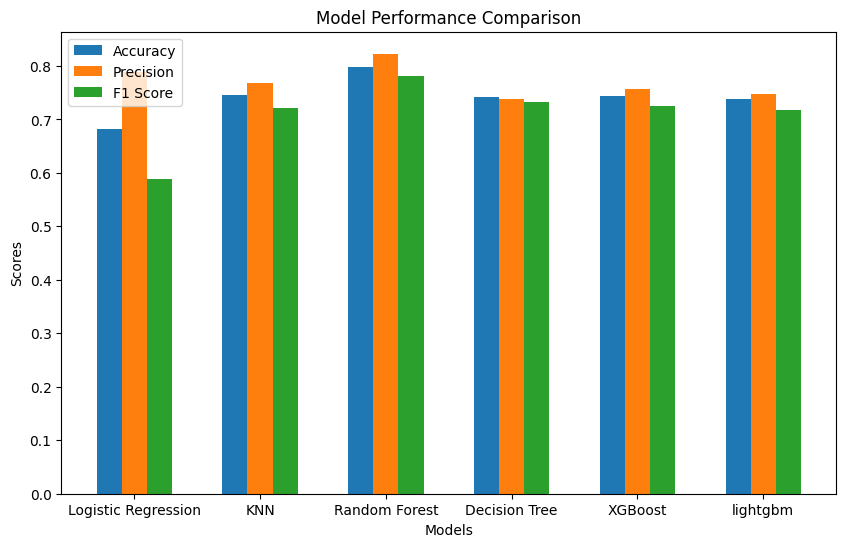

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Model names
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree','XGBoost', 'lightgbm']

# Scores
accuracy = [
    accuracy_score(Y_test, y_pred_lr),
    accuracy_score(Y_test, y_pred_knn),
    accuracy_score(Y_test, y_pred_rf),
    accuracy_score(Y_test, y_pred_dt),
    accuracy_score(Y_test, y_pred_xgb),
    accuracy_score(Y_test, y_pred_lgb)


]
precision = [
    precision_score(Y_test, y_pred_lr),
    precision_score(Y_test, y_pred_knn),
    precision_score(Y_test, y_pred_rf),
    precision_score(Y_test, y_pred_dt),
    precision_score(Y_test, y_pred_xgb),
    precision_score(Y_test, y_pred_lgb)

]
f1 = [
    f1_score(Y_test, y_pred_lr),
    f1_score(Y_test, y_pred_knn),
    f1_score(Y_test, y_pred_rf),
    f1_score(Y_test, y_pred_dt),
    f1_score(Y_test, y_pred_xgb),
    f1_score(Y_test, y_pred_lgb)



]

# Visualization
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, precision, width, label='Precision')
ax.bar(x + width, f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()
